## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [114]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import datetime as dt
import requests
from collections import Counter
import pickle

import os
API_key = os.environ.get('WWO_API_key')

In [123]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor

In [116]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()
print('Connection closed normally')

Connection was successful


In [117]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [118]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-07,DL,DL_CODESHARE,DL,4476,OO,N629BR,4476,14869,SLC,...,402.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-06-07,DL,DL_CODESHARE,DL,4477,OO,N816SK,4477,14869,SLC,...,1156.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-06-07,DL,DL_CODESHARE,DL,4477,OO,N816SK,4477,15016,STL,...,1156.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-06-07,DL,DL_CODESHARE,DL,4478,OO,N813SK,4478,13930,ORD,...,1250.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-06-07,DL,DL_CODESHARE,DL,4480,OO,N260SY,4480,14252,PSC,...,521.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2018-06-07,WN,WN,WN,5915,WN,N789SW,5915,13198,MCI,...,904.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1496,2018-06-07,WN,WN,WN,1147,WN,N8518R,1147,13198,MCI,...,1334.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1497,2018-06-07,WN,WN,WN,1810,WN,N208WN,1810,13198,MCI,...,1334.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1498,2018-06-07,WN,WN,WN,1866,WN,N7878A,1866,13198,MCI,...,706.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [124]:
df.to_csv('flights1500.csv',index=False)

In [127]:
##### LOAD IN FROM HERE TO SAVE TIME

df = pd.read_csv('flights1500.csv')

In [128]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-07,DL,DL_CODESHARE,DL,4476,OO,N629BR,4476,14869,SLC,...,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-07,DL,DL_CODESHARE,DL,4477,OO,N816SK,4477,14869,SLC,...,1156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-07,DL,DL_CODESHARE,DL,4477,OO,N816SK,4477,15016,STL,...,1156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-07,DL,DL_CODESHARE,DL,4478,OO,N813SK,4478,13930,ORD,...,1250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-07,DL,DL_CODESHARE,DL,4480,OO,N260SY,4480,14252,PSC,...,521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2018-06-07,WN,WN,WN,5915,WN,N789SW,5915,13198,MCI,...,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1489,2018-06-07,WN,WN,WN,1147,WN,N8518R,1147,13198,MCI,...,1334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1490,2018-06-07,WN,WN,WN,1810,WN,N208WN,1810,13198,MCI,...,1334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1491,2018-06-07,WN,WN,WN,1866,WN,N7878A,1866,13198,MCI,...,706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [7]:
df['arr_delay'][df['arr_delay']> 150]

9       603.0
101     161.0
160     164.0
181     346.0
182     640.0
189     322.0
210     254.0
223     179.0
236     184.0
366     191.0
438     206.0
442     172.0
450     815.0
451     168.0
466     157.0
501     177.0
529     239.0
533     289.0
536     157.0
562     305.0
576     192.0
585     173.0
595     175.0
600     999.0
627     241.0
687     196.0
688     185.0
717     164.0
1027    284.0
1071    274.0
1172    194.0
1173    180.0
1178    243.0
1179    391.0
1208    170.0
1277    166.0
1342    167.0
1343    192.0
1344    189.0
1353    185.0
1418    229.0
1419    277.0
1420    272.0
1440    175.0
1452    153.0
1453    175.0
1490    258.0
1491    271.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

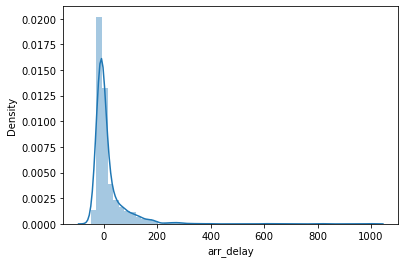

In [8]:
sns.distplot(df['arr_delay'])

In [9]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.7702685594558716, 1.4668652194705753e-40)

In [10]:
stats.trim_mean(df['arr_delay'], 0.20)

-2.375570776255708

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
connection,cursor = open_connection(params)

months = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly
i='00'
for mon in range(1,13):
    print('working...')
    if mon < 10:
        i = '0' + str(mon)  # need to format single digits from '1' -> '01'    This can be changed but i forget offhand the SQL wildcard CHar for any OR NONE characters
    else:
        i = str(mon)
    query = f'''
    SELECT * FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    month.dropna(subset=['fl_date','dep_time'], inplace=True)
    months.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
Connection closed, operation completed


In [131]:
file_months = open('flights_months.obj', 'wb')
pickle.dump(months, file_months)

In [135]:
file_handler1 = open('flights_months.obj', 'rb')
months = pickle.load(file_handler1)

In [136]:
months[0].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dep_weather,taxi_time
0,2018-01-06,AA,AA_CODESHARE,AA,6070,CP,N207AN,6070,10140,ABQ,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Clear,22.0
1,2019-01-22,AA,AA,AA,2565,AA,N905NN,2565,14524,RIC,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Sunny,29.0
2,2018-01-16,UA,UA_CODESHARE,UA,4001,EV,N12172,4001,11042,CLE,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Overcast,25.0
3,2018-01-15,UA,UA_CODESHARE,UA,3541,YX,N648RW,3541,13930,ORD,...,0.0,37.0,0.0,0.0,,NaN,NaN,None,Clear,50.0
4,2018-01-28,DL,DL_CODESHARE,DL,6153,YX,N213JQ,6153,12953,LGA,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Overcast,48.0
5,2019-01-29,DL,DL_CODESHARE,DL,3841,OO,N692CA,3841,13487,MSP,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Moderate rain,59.0
6,2019-01-21,AA,AA,AA,2783,AA,N186AN,2783,11503,EGE,...,37.0,0.0,0.0,82.0,None,NaN,NaN,None,Sunny,42.0
7,2019-01-04,DL,DL,DL,2922,DL,N939AT,2922,14635,RSW,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Cloudy,24.0
8,2018-01-24,WN,WN,WN,1385,WN,N7813P,1385,14679,SAN,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Patchy light snow,12.0
9,2018-01-08,HA,HA,HA,182,HA,N494HA,182,12173,HNL,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Partly cloudy,16.0


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

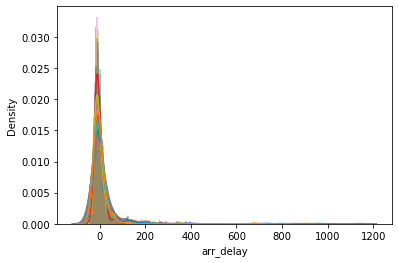

In [13]:
for month in months:
    sns.distplot(month['arr_delay'])

In [14]:
for i in range(12):
    print('month', i, 'mean:', stats.trim_mean(months[i]['arr_delay'], 0.20))  # trim_mean removes the N percent of either tails, in this case 20% to deal with outliers (then calculates mean)

print()  

for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i]['arr_delay'], 0.20)))      # median must be called as np.median(data), so trim_both only performs a trim

month 0 mean: -5.853932584269663
month 1 mean: -5.137142857142857
month 2 mean: -5.685393258426966
month 3 mean: -6.776536312849162
month 4 mean: -3.5977011494252875
month 5 mean: -1.5112359550561798
month 6 mean: -4.948275862068965
month 7 mean: -3.303370786516854
month 8 mean: -7.4581005586592175
month 9 mean: -4.151685393258427
month 10 mean: -4.292817679558011
month 11 mean: -5.2555555555555555

month 0 median -7.0
month 1 median -6.0
month 2 median -7.0
month 3 median -8.0
month 4 median -5.0
month 5 median -3.0
month 6 median -7.0
month 7 median -5.0
month 8 median -9.0
month 9 median -5.0
month 10 median -7.0
month 11 median -6.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [15]:
import os
API_key = os.environ.get('WWO_API_key')  # Make Sure you make your own API key to try, if we share it will probably run out of daily limit too soon

In [16]:
month_df = months[0]
month_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-06,AA,AA_CODESHARE,AA,6070,CP,N207AN,6070,10140,ABQ,...,677.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
1,2019-01-22,AA,AA,AA,2565,AA,N905NN,2565,14524,RIC,...,257.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-01-16,UA,UA_CODESHARE,UA,4001,EV,N12172,4001,11042,CLE,...,419.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
3,2018-01-15,UA,UA_CODESHARE,UA,3541,YX,N648RW,3541,13930,ORD,...,286.0,29.0,0.0,37.0,0.0,0.0,,NaN,NaN,None
4,2018-01-28,DL,DL_CODESHARE,DL,6153,YX,N213JQ,6153,12953,LGA,...,214.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-14,DL,DL,DL,1952,DL,N865DN,1952,11986,GRR,...,640.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
296,2018-01-07,AA,AA_CODESHARE,AA,3670,MQ,N925AE,3670,14492,RDU,...,427.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
297,2019-01-14,UA,UA_CODESHARE,UA,4333,EV,N11551,4333,12266,IAH,...,513.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
298,2019-01-28,G4,G4,G4,1047,G4,309NV,1047,13476,MRY,...,375.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [17]:
# Finds correct index for WWO json for the right 3 hour period, in order to find weather description

# parameters(time (h,m))   returns (index(int))
def decide_time(time):
    if time[:-2] == '':
        h = 0
    else:
        h = int(time[:-2])
    # try:
    m = int(time[-2:])
    # except:
    #     print("ERROR: m is", time[-2:], '!!!')
        
    if m > 30 & h != 23:  # averages the hour up using minutes, unless it rolls over to next day (past 2400)
        h+1
    if h >= 21:
        return 7
    elif h >= 18:
        return 6
    elif h >= 15:
        return 5
    elif h >= 12:
        return 4
    elif h >= 9:
        return 3
    elif h >= 6:
        return 2
    elif h >= 3:
        return 1
    else:
        return 0   # Probably the worst function I've ever wrote, don't know python well enough to make this concise (enumerate instead?)

In [18]:
airports = pd.read_csv('airports.csv')  # found a database of airports, so with airport IATA code i can get the lat,lon coords for the actual weather around that airport
                                        # not just the whole city. Link to the database: https://davidmegginson.github.io/ourairports-data/airports.csv
def get_latlon(df):                     
    
    IATA = df.loc[0]['origin']          
    latlon = airports[airports['iata_code']==IATA][['latitude_deg','longitude_deg']].values[0]

    return latlon

In [19]:
def get_montly_weathers(months):
    for df in months:
        dep_datetime = get_dep_datetime(df)
        lat,lon = get_latlon(df)

        url = f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={API_key}&q={lat},{lon}&num_of_days=1&format=json"
        data = requests.get(url).json()
        weather = data['data']['current_condition'][0]['weatherDesc'][0]['value']
        weather 

In [20]:
def get_weatherDesc(row):
    date, time = row.loc['fl_date'], str(row.loc['dep_time'])[:-2]
    lat,lon = get_latlon(df)
    time_cursor = decide_time(time)
    
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={API_key}&q={lat},{lon}&date={date}&num_of_days=1&format=json"
    data = requests.get(url).json()
    data

    weather = data['data']['weather'][0]['hourly'][time_cursor]['weatherDesc'][0]['value']
    return weather 

In [21]:
for i in range(len(months)):
    print("Working", end='')
    for index,row in months[i].head(10).iterrows():
        print('.', end='')
        months[i].loc[index, 'dep_weather'] = get_weatherDesc(row)
    print()
print("Done!")

Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Done!


In [ ]:
file_months = open('flights_wmonths.obj', 'wb')
pickle.dump(months, file_months)

In [ ]:
file_handler2 = open('flights_wmonths.obj', 'rb')
wmonths = pickle.load(file_handler2)

In [138]:
wmonths[0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dep_weather,taxi_time
0,2018-01-06,AA,AA_CODESHARE,AA,6070,CP,N207AN,6070,10140,ABQ,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Clear,22.0
1,2019-01-22,AA,AA,AA,2565,AA,N905NN,2565,14524,RIC,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Sunny,29.0
2,2018-01-16,UA,UA_CODESHARE,UA,4001,EV,N12172,4001,11042,CLE,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Overcast,25.0
3,2018-01-15,UA,UA_CODESHARE,UA,3541,YX,N648RW,3541,13930,ORD,...,0.0,37.0,0.0,0.0,,NaN,NaN,None,Clear,50.0
4,2018-01-28,DL,DL_CODESHARE,DL,6153,YX,N213JQ,6153,12953,LGA,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,Overcast,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-14,DL,DL,DL,1952,DL,N865DN,1952,11986,GRR,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,19.0
296,2018-01-07,AA,AA_CODESHARE,AA,3670,MQ,N925AE,3670,14492,RDU,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,NaN,46.0
297,2019-01-14,UA,UA_CODESHARE,UA,4333,EV,N11551,4333,12266,IAH,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,31.0
298,2019-01-28,G4,G4,G4,1047,G4,309NV,1047,13476,MRY,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,16.0


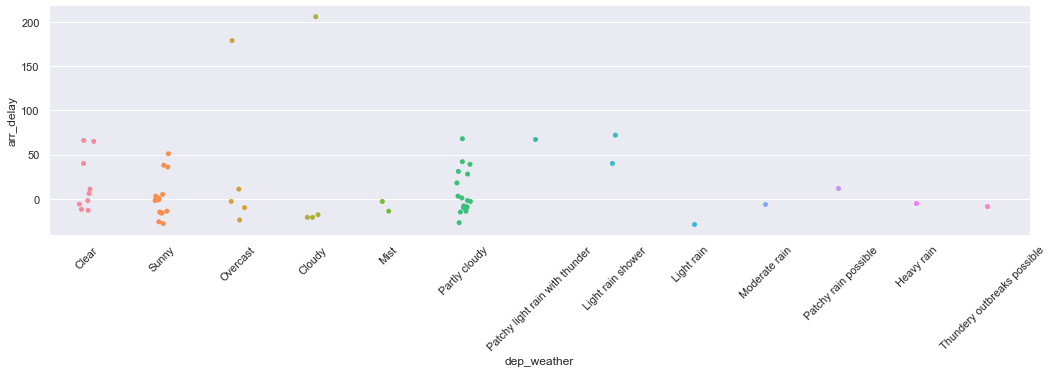

In [22]:
wdf = wmonths[0].head()

for i in range(1,len(wmonths)):
    wdf = wdf.append(wmonths[i].head(), ignore_index=True)
sns.set()
sns.catplot(x="dep_weather", y="arr_delay", data=wdf, height=4, aspect=15/4)
plt.xticks(rotation=45)
plt.show()

In [23]:
# conds = wdf['dep_weather'].unique() 

# wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()

weather_count = Counter()

for condition in wdf['dep_weather'].unique():
    weather_count[condition] = wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()
    

for condition in wdf['dep_weather'].unique():
    print(condition,' percentage of delays: ', (weather_count[condition] / sum(weather_count.values()))*100, '%',sep='')

Clear percentage of delays: 19.230769230769234%
Sunny percentage of delays: 23.076923076923077%
Overcast percentage of delays: 7.6923076923076925%
Cloudy percentage of delays: 3.8461538461538463%
Mist percentage of delays: 0.0%
Partly cloudy percentage of delays: 30.76923076923077%
Patchy light rain with thunder percentage of delays: 3.8461538461538463%
Light rain shower percentage of delays: 7.6923076923076925%
Light rain percentage of delays: 0.0%
Moderate rain percentage of delays: 0.0%
Patchy rain possible percentage of delays: 3.8461538461538463%
Heavy rain percentage of delays: 0.0%
Thundery outbreaks possible percentage of delays: 0.0%


### ^^^ Looks like sunny weather has the most delays - interesting. Not much correllation between bad weather and arrival delay

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [24]:
for month in months:
    month['taxi_time'] = month['taxi_in'] + month['taxi_out']

month_df['taxi_time']

0      22.0
1      29.0
2      25.0
3      50.0
4      48.0
       ... 
295    19.0
296    46.0
297    31.0
298    16.0
299    16.0
Name: taxi_time, Length: 296, dtype: float64

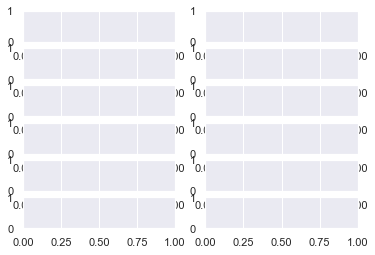

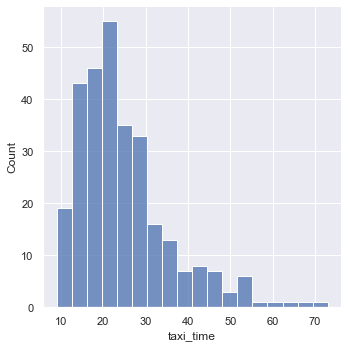

In [25]:
fig, axes = plt.subplots(nrows=6,ncols=2)

axes[0] = sns.displot(months[0]['taxi_time'], kind='hist', )   # This might be complicated to fix, but probably not

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [26]:
with_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] > 0)]['dep_delay'].count()
without_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] <= 0)]['dep_delay'].count()
total = (with_dep + without_dep)

print('Percentage of arrival delays with departure delay:   ', (with_dep/total)*100)
print('Percentage of arrival delays without departure delay:', (without_dep/total)*100)

Percentage of arrival delays with departure delay:    80.35087719298247
Percentage of arrival delays without departure delay: 19.649122807017545


                                   No surprise here ^^^

#### **Task 6**: How many states cover 50% of US air traffic? 

In [27]:
connection, cursor = open_connection(params)
query1 = 'SELECT origin, dest FROM flights ORDER BY random() LIMIT 1000;'

cursor.execute(query1)
data = cursor.fetchall()

connection.close()
print('Connection closed')

Connection was successful
Connection closed


In [28]:
df2 = pd.DataFrame(data, columns=['origin','dest'])
df2

,origin,dest
0,RIC,MIA
1,MSP,BNA
2,SDF,CLT
3,DSM,IAH
4,MGM,ATL
...,...,...
995,DFW,EWR
996,ANC,DEN
997,RDU,LAX
998,MSY,BNA


In [139]:
df2.to_csv('df2.csv', index=False)

In [140]:
# LOAD IN FROM HERE TO SAVE TIME

df2 = pd.read_csv('df2.csv')

In [141]:
df2

,origin,dest
0,RIC,MIA
1,MSP,BNA
2,SDF,CLT
3,DSM,IAH
4,MGM,ATL
...,...,...
995,DFW,EWR
996,ANC,DEN
997,RDU,LAX
998,MSY,BNA


In [142]:
state_count = Counter()

for IATA in df2['origin']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1
    
for IATA in df2['dest']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1

In [143]:
del state_count['PR-U-A'] # drop Puerto Rico (unincorporated US territory)
del state_count['VI-U-A'] # drop US Virgin Islands (unincorporated US territory)


total = sum(state_count.values())
cmltv_per = 0 # cumulative percentage initialized to 0
state_lst = [] # cumulative state percentage initialized to empty


for region in state_count.most_common(): # region is tuple (US-MI, 274) of US state and the count of arrivals/departures in that state.
    percent = (region[1]/total)*100 #calc percentage
    print(region[0],'  ', percent) 
    if cmltv_per<50: #cumulative percentage
        cmltv_per += percent
        state_lst.append(region[0])

print(state_lst, round(cmltv_per, 3), "Number of states covering 50% of US air traffic:", len(state_lst))

US-CA    11.038635223281485
US-TX    9.483191169091821
US-FL    7.275464124435524
US-IL    6.623181133968892
US-NC    5.5193176116407425
US-GA    5.268439538384345
US-NY    5.117912694430507
US-CO    3.612644254892122
US-PA    3.311590566984446
US-DC    2.7094831911690918
US-AZ    2.6091319618665327
US-WA    2.5589563472152537
US-MI    2.5589563472152537
US-MN    2.458605117912694
US-NV    2.1575514300050176
US-NJ    2.1575514300050176
US-TN    2.0572002007024586
US-OH    1.9066733567486203
US-MO    1.8564977420973405
US-OR    1.806322127446061
US-MA    1.655795283492223
US-HI    1.655795283492223
US-UT    1.5052684395383844
US-KY    1.3547415955845459
US-MD    1.2543903662819869
US-WI    1.1038635223281485
US-VA    0.8529854490717512
US-LA    0.8529854490717512
US-SC    0.7526342197691922
US-NM    0.7024586051179127
US-IN    0.6522829904666332
US-AL    0.5519317611640743
US-ID    0.5519317611640743
US-MT    0.5519317611640743
US-IA    0.5017561465127948
US-NE    0.35122930255895635
US

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [144]:
iata_count = Counter()

for IATA in df2['origin']:    # Count all flights with origin or destination having a specific airport IATA code
    iata_count[IATA] += 1
for IATA in df2['dest']:
    iata_count[IATA] += 1
    
top_airports = iata_count.most_common()[:10] # 10 most common
top_iatas = [i[0] for i in top_airports]
top_airports

[('ORD', 106),
 ('ATL', 99),
 ('DFW', 81),
 ('LAX', 76),
 ('CLT', 74),
 ('DEN', 63),
 ('PHL', 49),
 ('SFO', 49),
 ('IAH', 46),
 ('MSP', 44)]

In [145]:
top_iatas

['ORD', 'ATL', 'DFW', 'LAX', 'CLT', 'DEN', 'PHL', 'SFO', 'IAH', 'MSP']

In [146]:
total = sum(iata_count.values())
cmltv_per = 0

for airport in top_iatas: # region is tuple (IATA, 111) of airport code and the count of arrivals/departures in that airport.
    percent = (iata_count[airport]/total)*100 #calc percentage
    cmltv_per += percent
    print(airport,'  ', percent) 
print("\nTotal coverage: ", cmltv_per, '%', sep='')

ORD    5.3
ATL    4.95
DFW    4.05
LAX    3.8
CLT    3.6999999999999997
DEN    3.15
PHL    2.45
SFO    2.45
IAH    2.3
MSP    2.1999999999999997

Total coverage: 34.35%


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [147]:
# for month in months: # Something like this i think? for first three bullets?
#     print(month['']) # Do something with sum()/(rows-with-delays)

In [148]:
del_count = Counter()

for month in months:
    delay_df = month[['mkt_carrier','arr_delay']][month['arr_delay']>0].groupby('mkt_carrier').sum()
    carriers,delay = delay_df.index, delay_df['arr_delay']
    del_count += dict(zip(carriers,delay))
    
del_count

Counter({'AA': 14572.0,
         'AS': 2116.0,
         'B6': 2566.0,
         'DL': 11384.0,
         'F9': 541.0,
         'G4': 978.0,
         'HA': 280.0,
         'NK': 1029.0,
         'UA': 10052.0,
         'WN': 6533.0})

In [44]:
connection,cursor = open_connection(params)

query =  "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'fuel_comsumption';"
cursor.execute(query)
columns = cursor.fetchall()
columns = [col[0]for col in columns ]

fuel_months_df = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly

for i in range(1,13): # months
    query = f'''
    SELECT * FROM fuel_comsumption
    WHERE month = {i}
    ORDER BY random()
    LIMIT 15;;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    # month.dropna(subset=['fl_date','dep_time'], inplace=True)
    fuel_months_df.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
Connection closed, operation completed


In [150]:
file_fuel_months = open('flights_fuel_months.obj', 'wb')
pickle.dump(fuel_months_df, file_fuel_months)

In [151]:
file_handler3 = open('flights_fuel_months.obj', 'rb')
fuel_months_df = pickle.load(file_handler3)

In [153]:
fuel_months_df[0].head(5)

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,20448.0,S5,S5,Shuttle America Corp.,2,3793819.0,0.0,0.0,0.0,...,3841009.0,0.0,0.0,0.0,0.0,3841009.0,3841009.0,0.0,3841009.0,2016
1,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
2,1,20007.0,5Y,5Y,Atlas Air Inc.,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10592898.0,50069690.0,60662588.0,2015
3,1,21492.0,1BQ,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102795.0,74193.0,176988.0,2019
4,1,20177.0,PFQ,PFQ,Asia Pacific,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512160.0,512160.0,2016


In [154]:
month = fuel_months_df[0]
month

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,20448.0,S5,S5,Shuttle America Corp.,2,3793819.0,0.0,0.0,0.0,...,3841009.0,0.0,0.0,0.0,0.0,3841009.0,3841009.0,0.0,3841009.0,2016
1,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
2,1,20007.0,5Y,5Y,Atlas Air Inc.,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10592898.0,50069690.0,60662588.0,2015
3,1,21492.0,1BQ,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102795.0,74193.0,176988.0,2019
4,1,20177.0,PFQ,PFQ,Asia Pacific,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512160.0,512160.0,2016
5,1,20355.0,US,US,US Airways Inc.,3,69739550.0,10615705.0,0.0,7509239.0,...,120874399.0,19367563.0,0.0,13620008.0,32987571.0,153861970.0,121510869.0,33158438.0,154669307.0,2015
6,1,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,687478.0,807982.0,1495460.0,2018
7,1,21167.0,CP,CP,Compass Airlines,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
8,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,309045.0,0.0,0.0,0.0,...,837738.0,0.0,0.0,0.0,0.0,837738.0,987918.0,0.0,987918.0,2018
9,1,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,905436.0,10495937.0,11401373.0,2019


In [155]:
month[['total_gallons','carrier','carrier_name']].sort_values('total_gallons',ascending=False)

,total_gallons,carrier,carrier_name
5,88316163.0,US,US Airways Inc.
10,70408211.0,B6,JetBlue Airways
14,26626529.0,NK,Spirit Air Lines
2,25753495.0,5Y,Atlas Air Inc.
12,14194685.0,VX,Virgin America
9,4086224.0,X9,Omni Air International LLC
0,3793819.0,S5,Shuttle America Corp.
6,550328.0,XP,XTRA Airways
8,364447.0,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...
11,287340.0,PFQ,Asia Pacific
